# Lecture 3: Data reshaping and visualization

_"Data visualization", "chart", "graph", and will be used interchangeably._

_Please sign attendance sheet; close devices_


Ensure the visualizations [render](https://plotly.com/python/renderers/) properly across VSCode, Jupyter Book, etc. You can ignore this.


In [1]:
import plotly.io as pio

pio.renderers.default = "notebook_connected+plotly_mimetype"

## [Example from first class](https://python-public-policy.afeld.me/en/{{school_slug}}/lecture_0.html#jupyter)


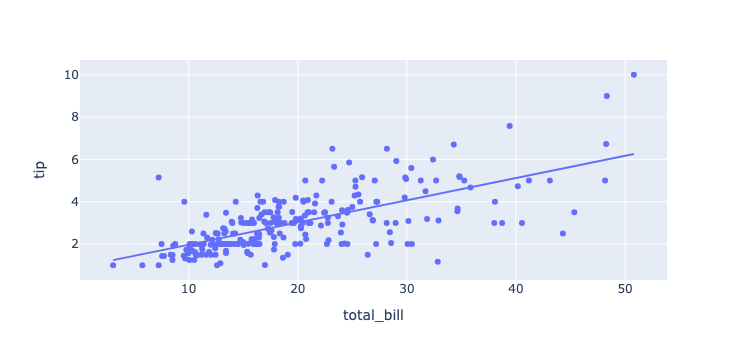

In [2]:
import plotly.express as px

df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", trendline="ols")
fig.show()

This [includes a trendline](https://plotly.com/python/linear-fits/). Let's take a look at the statistical summary, via the [`statsmodels`](https://www.statsmodels.org/) package, following [Plotly's example](https://plotly.com/python/linear-fits/#fitting-multiple-lines-and-retrieving-the-model-parameters):


In [3]:
trend_results = px.get_trendline_results(fig).iloc[0, 0]
trend_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           6.69e-34
Time:                        18:42:10   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.000       0.606       1.235
x1             0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

["In general, the higher the R-squared, the better the model fits your data."](https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit)


## In-class exercise

Using [NYC parks data](https://data.cityofnewyork.us/Recreation/Parks-Properties/enfh-gkve/about_data), make a [histogram](https://plotly.com/python/histograms/) of parks by borough. You're welcome to talk with your neighbors.


## [Fertility rates](https://data.worldbank.org/indicator/SP.DYN.TFRT.IN?end=2022&start=1960&view=chart) demo


What should we look at?


## [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html)

Like [pivot tables in spreadsheets](https://support.google.com/docs/answer/1272900)


<video controls src="https://github.com/afeld/python-public-policy/raw/main/extras/img/pivot.mp4"></video>


## Mapping

Let's make a map. What should it be?


### [Choropleth maps](https://plotly.com/python/tile-county-choropleth/)


### Geospatial data

To make a choropleth map, we need shapes. We'll use [country boundaries as GeoJSON](https://github.com/nvkelso/natural-earth-vector/tree/master/geojson) from [Natural Earth](https://www.naturalearthdata.com/).


https://raw.githubusercontent.com/nvkelso/natural-earth-vector/refs/heads/master/geojson/ne_50m_admin_0_countries.geojson


The structure looks something like:

```
{
  "type": "FeatureCollection",
  "name": "ne_50m_admin_0_countries",
  "features": [
    {
      "type": "Feature",
      "properties": {
        "NAME": "Fiji",
        "ADM0_ISO": "FJI",
        ...
      },
      "bbox": [
        -180,
        -18.28799,
        180,
        -16.020882
      ],
      "geometry": {
        "type": "MultiPolygon",
        "coordinates": [
          [
            [
              [180, -16.067133],
              [180, -16.555217],
              ...
            ]
          ]
        ]
      }
    },
    ...
  ]
}
```


`ADM0_ISO` is the property we're looking for. We'll [specify this as the `featureidkey`](https://plotly.com/python/mapbox-county-choropleth/#indexing-by-geojson-properties).


**Fun fact** (for a certain kind of person): [What the zoom level means](https://docs.mapbox.com/help/glossary/zoom-level/)


## Chart hygiene

- Always include a title
- Make sure you label dependent and independent variables (X and Y axes)
- Consider whether you are working with continuous vs. discrete values
- If you're trying to show more than three variables at once (e.g. X axis, Y axis, and color), try simplifying


## What visualization should I use?

Rudimentary guidelines:

| What do you want to do?                         |                                Chart type                                 |
| :---------------------------------------------- | :-----------------------------------------------------------------------: |
| Show changes over time                          |                                Line chart                                 |
| Compare values for categorical data             |                                 Bar chart                                 |
| Compare two numeric variables                   |                               Scatter plot                                |
| Count things / show distribution across a range |                                 Histogram                                 |
| Show geographic trends                          | [Map (choropleth, hexbin, bubble, etc.)](https://plotly.com/python/maps/) |

The [Data Design Standards](https://xdgov.github.io/data-design-standards/visualizations/) goes into more detail.


## Conditionals review

_If there's time_


### Pure ("Purr") Python

**Example:** Make a function that checks if the given name is one of my cats


In [4]:
# name = input("Name: ")
name = "Wilbur"

In [5]:
def test_cats(word):
    print(word)

    if word.lower() == "blondie" or word.lower() == "wilbur":
        return True
    elif otherthing:
        stuff
    else:
        return False

    # versus

    if word.lower() == "blondie" or word.lower() == "wilbur":
        something
    if otherthing:
        stuff


test_cats(name)

Wilbur


True

In [6]:
False or name

'Wilbur'

In [7]:
name == ("blondie" or "wilbur")

False

In [8]:
"blondie" or "wilbur"

'blondie'

### Pandas

[Comparison operators](https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing)\* are different, since you're working with full columns instead of single values.

_\*You may see these referred to as "bitwise operators", though that name isn't quite accurate._


[A sample dataset from Plotly:](https://plotly.com/python-api-reference/generated/plotly.data.html#plotly.data.medals_wide)


In [9]:
import plotly

medals = plotly.data.medals_wide()
medals

,nation,gold,silver,bronze
0,South Korea,24,13,11
1,China,10,15,8
2,Canada,9,12,12


In [10]:
medals["gold"] >= 10

0     True
1     True
2    False
Name: gold, dtype: bool

In [11]:
medals["silver"] >= 14

0    False
1     True
2    False
Name: silver, dtype: bool

In [12]:
(medals["gold"] >= 10) & (medals["silver"] >= 14)

0    False
1     True
2    False
dtype: bool

In [13]:
medals[(medals["gold"] >= 10) & (medals["silver"] >= 14)]

,nation,gold,silver,bronze
1,China,10,15,8


Refactored:


In [14]:
high_gold = medals["gold"] >= 10
high_silver = medals["silver"] >= 14

medals[high_gold & high_silver]

,nation,gold,silver,bronze
1,China,10,15,8


## [Homework 3](https://python-public-policy.afeld.me/en/{{school_slug}}/hw_3.html)


## Final Project


In real/ideal world, start with specific question and find data to answer it:

![project flow](extras/img/projectflow.png)

_Source: [Big Data and Social Science](https://textbook.coleridgeinitiative.org/chap-intro.html#the-structure-of-the-book)_


Data needed often doesn't exist or is hard (or impossible) to find/access


![project flow](extras/img/projectflow_amended.png)


[Final Project](https://python-public-policy.afeld.me/en/{{school_slug}}/final_project.html)
